While I navigated the Blending Kernels available for this competition. I always fear about overfitting on Private Leaderboard.  While I am still finalizing my kernel with EDA and Model, The inputs that use in this kernel are generated from the great contributions made by other Kernel GrandMasters, Masters or Experts. None of my inputs contains blends or stack results.

<pre><b>Credits to the Experts (Please like their kernels)
1. Navaneetha Kernel : https://www.kaggle.com/krishonaveen/xtreme-boost-and-feature-engineering
2. Shugen Kernel : https://www.kaggle.com/andrew60909/lgb-starter-r
3. Khan HBK Kernel : https://www.kaggle.com/duykhanh99/hust-lgb-starter-with-r 
4. Konstantin Kernel : https://www.kaggle.com/kyakovlev/ieee-gb-2-make-amount-useful-again/output
5. Avocado Kernel : https://www.kaggle.com/iasnobmatsu/xgb-model-with-feature-engineering?scriptVersionId=18686303
6. David's Kernel : https://www.kaggle.com/davidcairuz/feature-engineering-lightgbm-w-gpu
7. Lyalikov's Kernel : https://www.kaggle.com/timon88/lgbm-baseline-small-fe-no-blend
8. Yuanrong's Kernel : https://www.kaggle.com/yw6916/lgb-xgb-ensemble-stacking-based-on-fea-eng
9. Steve's Kernel : https://www.kaggle.com/abednadir/best-r-score
</b></pre>

In [1]:
from scipy.stats import rankdata
from scipy.stats.mstats import gmean

LABELS = ["isFraud"]

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline
from subprocess import check_output
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
all_files = glob.glob("../input/lgmodels/*.csv")
all_files

# Any results you write to the current directory are saved as output.

['../input/lgmodels/submission-.9449.csv',
 '../input/lgmodels/submission-.9460.csv',
 '../input/lgmodels/submission-.9485.csv',
 '../input/lgmodels/submission-.9459.csv',
 '../input/lgmodels/Submission-.9442.csv',
 '../input/lgmodels/submission-.9482.csv',
 '../input/lgmodels/Submission-.9429.csv',
 '../input/lgmodels/submission-.9454.csv',
 '../input/lgmodels/submission-.9456.csv',
 '../input/lgmodels/submission-.9408.csv',
 '../input/lgmodels/submission-.9472.csv',
 '../input/lgmodels/submission_.9452.csv',
 '../input/lgmodels/submission-0.9466.csv',
 '../input/lgmodels/submission-.9471.csv',
 '../input/lgmodels/submission-.9463.csv',
 '../input/lgmodels/submission-.9492.csv',
 '../input/lgmodels/submission-.9474.csv',
 '../input/lgmodels/submission-.9493.csv',
 '../input/lgmodels/submission-.9466.csv',
 '../input/lgmodels/submission-.9451.csv',
 '../input/lgmodels/submission-0.9480.csv',
 '../input/lgmodels/submission-0.9467.csv',
 '../input/lgmodels/submission-.9469.csv',
 '../inp

In [3]:
predict_list = []
predict_list.append(pd.read_csv('../input/lgmodels/Submission-.9433.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9451.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9459.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9463.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-0.9467.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/Submission-.9440.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9454.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-0.9466.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-0.9475.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-0.9433.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-0.9468.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9452.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/Submission-.9429.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9449.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9457.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/Submission-.9438.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/Submission-.9442.csv')[LABELS].values)
predict_list.append(pd.read_csv('../input/lgmodels/submission-.9469.csv')[LABELS].values)


In [4]:
import warnings
warnings.filterwarnings("ignore")
print("Rank averaging on ", len(predict_list), " files")
predictions = np.zeros_like(predict_list[0])
for predict in predict_list:
    for i in range(1):
        predictions[:, i] = np.add(predictions[:, i], rankdata(predict[:, i])/predictions.shape[0])  
predictions /= len(predict_list)

submission = pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv')
submission[LABELS] = predictions
submission.to_csv('AggStacker.csv', index=False)

Rank averaging on  18  files


In [5]:
submission.head()

,TransactionID,isFraud
0,3663549,0.148316
1,3663550,0.303770
2,3663551,0.262642
3,3663552,0.243501
4,3663553,0.220511


# Stacking Approach using GMean and Median

<pre><b>The idea of GMean is taken from Paulo's Kernel https://www.kaggle.com/paulorzp/gmean-of-light-gbm-models-lb-0-947x</b></pre>

In [6]:
sub_path = "../input/lgmodels/"
all_files = os.listdir(sub_path)
all_files

['submission-.9449.csv',
 'submission-.9460.csv',
 'submission-.9485.csv',
 'submission-.9459.csv',
 'Submission-.9442.csv',
 'submission-.9482.csv',
 'Submission-.9429.csv',
 'submission-.9454.csv',
 'submission-.9456.csv',
 'submission-.9408.csv',
 'submission-.9472.csv',
 'submission_.9452.csv',
 'submission-0.9466.csv',
 'submission-.9471.csv',
 'submission-.9463.csv',
 'submission-.9492.csv',
 'submission-.9474.csv',
 'submission-.9493.csv',
 'submission-.9466.csv',
 'submission-.9451.csv',
 'submission-0.9480.csv',
 'submission-0.9467.csv',
 'submission-.9469.csv',
 'Submission-.9438.csv',
 'submission-.9457.csv',
 'submission-.9480.csv',
 'Submission-.9440.csv',
 'Submission-.9433.csv',
 'submission-.9473.csv',
 'submission-.9452.csv',
 'submission-0.9468.csv',
 'submission-0.9433.csv',
 'submission-0.9475.csv']

In [7]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [8]:
# check correlation
concat_sub.iloc[:,1:ncol].corr()

,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,...,mol23,mol24,mol25,mol26,mol27,mol28,mol29,mol30,mol31,mol32
mol0,1.000000,0.980393,0.975562,0.984345,0.980645,0.967945,0.993333,0.973420,0.984797,0.908539,...,0.989144,0.985089,0.976078,0.984243,0.981413,0.980115,0.983165,0.976481,0.992548,0.977647
mol1,0.980393,1.000000,0.976189,0.978645,0.973584,0.967353,0.974243,0.981100,0.987273,0.919853,...,0.980976,0.976193,0.975147,0.979429,0.972361,0.973456,0.976069,0.984479,0.986181,0.980907
mol2,0.975562,0.976189,1.000000,0.972831,0.967013,0.969613,0.971872,0.973988,0.976020,0.940926,...,0.972095,0.973077,0.998299,0.968460,0.968148,0.975603,0.973155,0.975790,0.973255,0.977514
mol3,0.984345,0.978645,0.972831,1.000000,0.979548,0.965707,0.977222,0.978884,0.985992,0.908667,...,0.981910,0.980117,0.972821,0.981095,0.973541,0.980073,0.972928,0.983571,0.980848,0.984507
mol4,0.980645,0.973584,0.967013,0.979548,1.000000,0.961210,0.975164,0.970159,0.979519,0.907011,...,0.985424,0.992380,0.966230,0.984435,0.992497,0.971470,0.973879,0.973885,0.976558,0.975402
mol5,0.967945,0.967353,0.969613,0.965707,0.961210,1.000000,0.961379,0.960869,0.975708,0.924688,...,0.967156,0.965982,0.968755,0.962950,0.961431,0.967914,0.965752,0.964174,0.964035,0.965594
mol6,0.993333,0.974243,0.971872,0.977222,0.975164,0.961379,1.000000,0.965417,0.978967,0.900163,...,0.984039,0.980009,0.973074,0.978698,0.978667,0.970477,0.980773,0.968881,0.988057,0.968684
mol7,0.973420,0.981100,0.973988,0.978884,0.970159,0.960869,0.965417,1.000000,0.975980,0.919349,...,0.974809,0.974907,0.972597,0.972227,0.964629,0.981153,0.966046,0.996966,0.979768,0.993819
mol8,0.984797,0.987273,0.976020,0.985992,0.979519,0.975708,0.978967,0.975980,1.000000,0.920059,...,0.986187,0.979286,0.975365,0.985676,0.977283,0.978200,0.980525,0.979861,0.981644,0.980329
mol9,0.908539,0.919853,0.940926,0.908667,0.907011,0.924688,0.900163,0.919349,0.920059,1.000000,...,0.908450,0.911450,0.937758,0.908526,0.904062,0.922102,0.906876,0.918262,0.906872,0.921856


In [9]:
concat_sub.describe()

,TransactionID,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,...,mol23,mol24,mol25,mol26,mol27,mol28,mol29,mol30,mol31,mol32
count,5.066910e+05,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,...,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000
mean,3.916894e+06,0.024811,0.026594,0.023501,0.029096,0.029432,0.026306,0.022757,0.028570,0.027833,...,0.026366,0.027809,0.023234,0.028366,0.024259,0.027060,0.020635,0.028858,0.025772,0.057536
std,1.462692e+05,0.113178,0.114575,0.113764,0.116813,0.118074,0.114680,0.111319,0.117342,0.116845,...,0.114873,0.114949,0.115042,0.114838,0.117395,0.118090,0.117921,0.116262,0.111998,0.231610
min,3.663549e+06,0.000156,0.000057,0.000063,0.000290,0.000040,0.000070,0.000108,0.000130,0.000077,...,0.000118,0.000399,0.000058,0.000111,0.000004,0.000103,0.000005,0.000263,0.000208,0.000555
25%,3.790222e+06,0.001249,0.001373,0.000959,0.002233,0.001876,0.001124,0.001082,0.001777,0.001454,...,0.001397,0.002174,0.000861,0.001887,0.000590,0.001278,0.000190,0.002013,0.001538,0.004063
50%,3.916894e+06,0.002787,0.003356,0.002162,0.004613,0.004687,0.002816,0.002363,0.004023,0.003645,...,0.003303,0.004659,0.002029,0.004338,0.001891,0.002964,0.000584,0.004261,0.003447,0.008491
75%,4.043566e+06,0.007720,0.009609,0.006007,0.011306,0.012518,0.008637,0.006379,0.010381,0.010453,...,0.009199,0.011236,0.005751,0.011505,0.006603,0.008427,0.002358,0.010796,0.009122,0.021534
max,4.170239e+06,0.998093,0.999646,0.998691,0.997602,0.999358,0.999568,0.998761,0.998662,0.999845,...,0.999335,0.997424,0.999111,0.999501,0.999855,0.998926,0.999967,0.997537,0.997847,1.994130


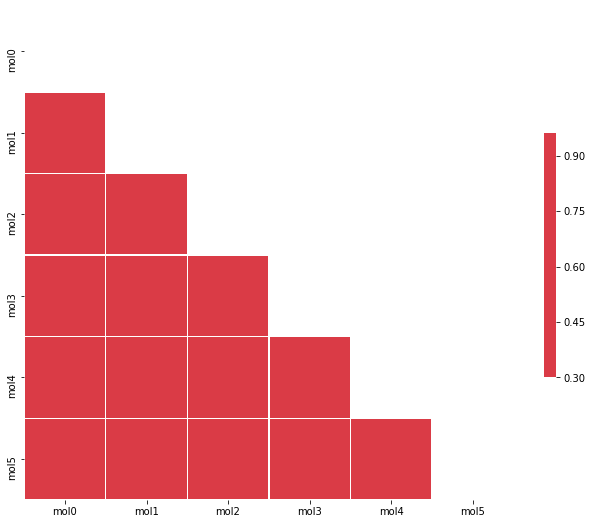

In [10]:
corr = concat_sub.iloc[:,1:7].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
rank = np.tril(concat_sub.iloc[:,1:].corr().values,-1)
m = (rank>0).sum()
m_gmean, s = 0, 0
for n in range(min(rank.shape[0],m)):
    mx = np.unravel_index(rank.argmin(), rank.shape)
    w = (m-n)/(m+n)
    print(w)
    m_gmean += w*(np.log(concat_sub.iloc[:,mx[0]+1])+np.log(concat_sub.iloc[:,mx[1]+1]))/2
    s += w
    rank[mx] = 1
m_gmean = np.exp(m_gmean/s)

1.0
0.996219281663516
0.9924528301886792
0.9887005649717514
0.9849624060150376
0.9812382739212008
0.9775280898876404
0.9738317757009346
0.9701492537313433
0.9664804469273743
0.9628252788104089
0.9591836734693877
0.9555555555555556
0.9519408502772643
0.948339483394834
0.9447513812154696
0.9411764705882353
0.9376146788990826
0.9340659340659341
0.9305301645338209
0.927007299270073
0.9234972677595629
0.92
0.9165154264972777
0.9130434782608695
0.9095840867992767
0.9061371841155235
0.9027027027027027
0.8992805755395683
0.895870736086176
0.8924731182795699
0.889087656529517
0.8857142857142857


# Geometric Mean Stacking

In [12]:
# get the data fields ready for stacking
concat_sub['isFraud'] = m_gmean
concat_sub[['TransactionID','isFraud']].to_csv('stack_gmean.csv', 
                                        index=False, float_format='%.4g')

# Median Stacking

In [13]:
concat_sub['m_median'] = concat_sub.iloc[:, 1:ncol].median(axis=1)
concat_sub['isFraud'] = concat_sub['m_median']
concat_sub[['TransactionID','isFraud']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')

AggStacker.csv generates the best score (.9475)